In [1]:
# Import packages and libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
import time

# Problem 1

In [2]:
# Define classifier

class Classifier(nn.Module):
  
  def __init__(self, d_in, d_out):
    super(Classifier, self).__init__()
    self.linear = nn.Linear(d_in, d_out)
  
  def forward(self, x):
    x = self.linear(x)
    return x

In [ ]:
# Define function for training

def train_classifier(net, train_dataloader, test_dataloader, d_in, d_out, lr, momentum, epochs):

  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  net = net.to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(net.parameters(), lr=lr, momentum=momentum)

  train_loss_list = []
  train_err_list = []
  test_loss_list = []
  test_err_list = []
  epoch_list = []

  start = time.time()

  for epoch in range(epochs): 

    for phase in ['train', 'test']:

      running_loss = 0
      corrects = 0

      if phase == 'train':
        dataloader = train_dataloader
        net.train()
      else:
        dataloader = test_dataloader
        net.eval()
      
      # Iterate through data
      for i, data in enumerate(dataloader):

        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        x = inputs.view(inputs.size(0), -1)
        optimizer.zero_grad()

        with torch.set_grad_enabled(phase == 'train'):
          outputs = net(x)
          loss = criterion(outputs, labels)
          _, predictions = torch.max(outputs, 1)

          if phase == 'train':
            loss.backward()
            optimizer.step()
          
        # Compute metrics
        running_loss += loss.item() * inputs.size(0)
        corrects += torch.sum(predictions == labels.data).item()

      epoch_loss = running_loss / len(dataloader.dataset)
      epoch_acc = corrects / len(dataloader.dataset)
      epoch_error = (1 - epoch_acc) * 100

      if phase == 'train':
        train_loss_list.append(epoch_loss)
        train_err_list.append(epoch_error)
        if (epoch + 1) % 10 == 0:
          print('Epoch {}'.format(epoch+1))
          print('Training loss: {:.4f} - error: {:.4f}'.format(epoch_loss, epoch_error))
      else:
        test_loss_list.append(epoch_loss)
        test_err_list.append(epoch_error)
        if (epoch + 1) % 10 == 0:
          print('Testing loss: {:.4f} - error: {:.4f}'.format(epoch_loss, epoch_error))
          print('--------------------------------------')

  training_time = time.time() - start
  print('Training completed in {:.0f}m {:.0f}'.format(training_time // 60, training_time % 60))

  return train_loss_list, train_err_list, test_loss_list, test_err_list

In [3]:
# Define location of the data
train_data = torchvision.datasets.MNIST(root='/data/', train=True, download=True, transform=torchvision.transforms.ToTensor())
test_data = torchvision.datasets.MNIST(root='/data/', train=False, download=True, transform=torchvision.transforms.ToTensor())

# Create dataloader
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=32,shuffle=True, num_workers=0)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=32,shuffle=True, num_workers=0)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/train-images-idx3-ubyte.gz to /data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/train-labels-idx1-ubyte.gz to /data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/t10k-images-idx3-ubyte.gz to /data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /data/MNIST/raw



In [ ]:
# Define model parameters
d_in = 28 * 28
d_out = 10
epochs = 50
lr = 1e-2
momentum = 0.9

# Train model
model = Classifier(d_in, d_out)
train_loss_list, train_err_list, test_loss_list, test_err_list = train_classifier(model, train_dataloader, test_dataloader, d_in, d_out, lr, momentum, epochs)

Epoch 10
Training loss: 0.2668 - error: 7.4200
Testing loss: 0.2742 - error: 7.8500
--------------------------------------
Epoch 20
Training loss: 0.2551 - error: 7.0417
Testing loss: 0.2709 - error: 7.6800
--------------------------------------
Epoch 30
Training loss: 0.2495 - error: 6.9033
Testing loss: 0.2691 - error: 7.5500
--------------------------------------
Epoch 40
Training loss: 0.2460 - error: 6.7933
Testing loss: 0.2716 - error: 7.5300
--------------------------------------
Epoch 50
Training loss: 0.2432 - error: 6.7550
Testing loss: 0.2782 - error: 7.6500
--------------------------------------
Training completed in 6m 1


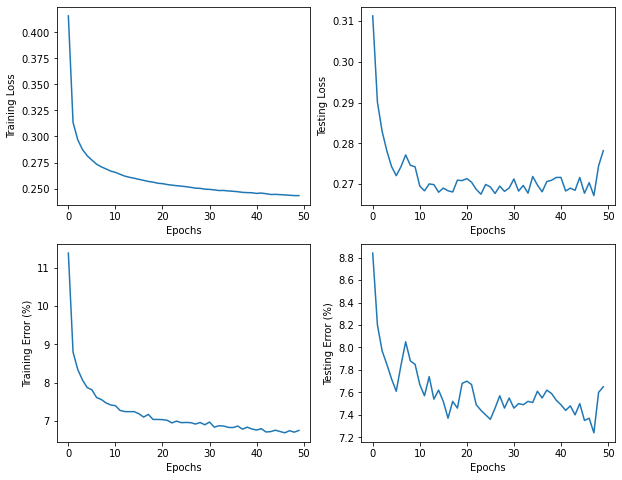

In [ ]:
# Plot training

plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.plot(train_loss_list)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')

plt.subplot(2,2,2)
plt.plot(test_loss_list)
plt.xlabel('Epochs')
plt.ylabel('Testing Loss')

plt.subplot(2,2,3)
plt.plot(train_err_list)
plt.xlabel('Epochs')
plt.ylabel('Training Error (%)')

plt.subplot(2,2,4)
plt.plot(test_err_list)
plt.xlabel('Epochs')
plt.ylabel('Testing Error (%)')

plt.show()

# Problem 2

In [4]:
# Define function for training

def train_classifier_mean(net, train_dataloader, test_dataloader, d_in, d_out, lr, momentum, epochs):

  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  net = net.to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(net.parameters(), lr=lr, momentum=momentum)

  train_loss_list = []
  train_err_list = []
  test_loss_list = []
  test_err_list = []
  epoch_list = []

  start = time.time()

  for epoch in range(epochs): 

    for phase in ['train', 'test']:

      running_loss = 0
      corrects = 0

      if phase == 'train':
        dataloader = train_dataloader
        net.train()
      else:
        dataloader = test_dataloader
        net.eval()
      
      # Iterate through data
      for i, data in enumerate(dataloader):

        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        inputs = inputs.view(inputs.size(0), -1)
        x = torch.mean(inputs, dim=1).reshape(-1, 1)
        x = torch.cat((inputs, x), dim=1)
        optimizer.zero_grad()

        with torch.set_grad_enabled(phase == 'train'):
          outputs = net(x)
          loss = criterion(outputs, labels)
          _, predictions = torch.max(outputs, 1)

          if phase == 'train':
            loss.backward()
            optimizer.step()
          
        # Compute metrics
        running_loss += loss.item() * inputs.size(0)
        corrects += torch.sum(predictions == labels.data).item()

      epoch_loss = running_loss / len(dataloader.dataset)
      epoch_acc = corrects / len(dataloader.dataset)
      epoch_error = (1 - epoch_acc) * 100

      if phase == 'train':
        train_loss_list.append(epoch_loss)
        train_err_list.append(epoch_error)
        if (epoch + 1) % 10 == 0:
          print('Epoch {}'.format(epoch+1))
          print('Training loss: {:.4f} - error: {:.4f}'.format(epoch_loss, epoch_error))
      else:
        test_loss_list.append(epoch_loss)
        test_err_list.append(epoch_error)
        if (epoch + 1) % 10 == 0:
          print('Testing loss: {:.4f} - error: {:.4f}'.format(epoch_loss, epoch_error))
          print('--------------------------------------')

  training_time = time.time() - start
  print('Training completed in {:.0f}m {:.0f}'.format(training_time // 60, training_time % 60))

  return train_loss_list, train_err_list, test_loss_list, test_err_list

In [5]:
# Define model parameters
d_in = (28 * 28) + 1
d_out = 10
epochs = 50
lr = 1e-2
momentum = 0.9

# Train model
model = Classifier(d_in, d_out)
train_loss_list, train_err_list, test_loss_list, test_err_list = train_classifier_mean(model, train_dataloader, test_dataloader, d_in, d_out, lr, momentum, epochs)

Epoch 10
Training loss: 0.2664 - error: 7.3883
Testing loss: 0.2718 - error: 7.4300
--------------------------------------
Epoch 20
Training loss: 0.2551 - error: 7.0717
Testing loss: 0.2725 - error: 7.6000
--------------------------------------
Epoch 30
Training loss: 0.2496 - error: 6.9317
Testing loss: 0.2677 - error: 7.5000
--------------------------------------
Epoch 40
Training loss: 0.2462 - error: 6.7900
Testing loss: 0.2679 - error: 7.5700
--------------------------------------
Epoch 50
Training loss: 0.2433 - error: 6.7050
Testing loss: 0.2698 - error: 7.5100
--------------------------------------
Training completed in 6m 7


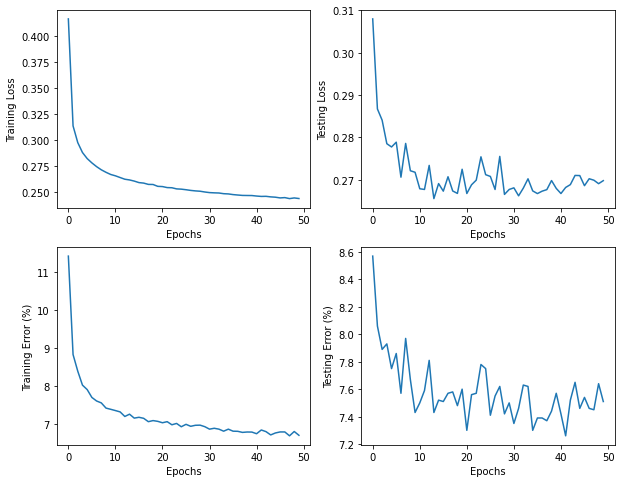

In [6]:
# Plot training

plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.plot(train_loss_list)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')

plt.subplot(2,2,2)
plt.plot(test_loss_list)
plt.xlabel('Epochs')
plt.ylabel('Testing Loss')

plt.subplot(2,2,3)
plt.plot(train_err_list)
plt.xlabel('Epochs')
plt.ylabel('Training Error (%)')

plt.subplot(2,2,4)
plt.plot(test_err_list)
plt.xlabel('Epochs')
plt.ylabel('Testing Error (%)')

plt.show()

# Problem 3

In [ ]:
# Define model

class ConvNet(nn.Module):
  
  def __init__(self):
    super(ConvNet, self).__init__()
    self.conv1 = nn.Conv2d(1, 8, 3, padding='same')
    self.relu = nn.ReLU()
    self.maxpool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(8, 16, 3, padding='same')
    self.fc1 = nn.Linear(16*7*7, 128)
    self.dropout = nn.Dropout(p=0.5)
    self.fc2 = nn.Linear(128, 10)
  
  def forward(self, x):
    x = self.maxpool(self.relu(self.conv1(x)))
    x = self.maxpool(self.relu(self.conv2(x)))
    x = x.view(x.size(0), -1)
    x = self.dropout(self.relu(self.fc1(x)))
    x = self.fc2(x)
    return x

In [ ]:
# Define function for training

def train_CNN(net, train_dataloader, test_dataloader, lr, momentum, epochs):

  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  net = net.to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(net.parameters(), lr=lr, momentum=momentum)

  train_loss_list = []
  train_err_list = []
  test_loss_list = []
  test_err_list = []
  epoch_list = []

  start = time.time()

  for epoch in range(epochs): 

    for phase in ['train', 'test']:

      running_loss = 0
      corrects = 0

      if phase == 'train':
        dataloader = train_dataloader
        net.train()
      else:
        dataloader = test_dataloader
        net.eval()
      
      # Iterate through data
      for i, data in enumerate(dataloader):

        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()

        with torch.set_grad_enabled(phase == 'train'):
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          _, predictions = torch.max(outputs, 1)

          if phase == 'train':
            loss.backward()
            optimizer.step()
          
        # Compute metrics
        running_loss += loss.item() * inputs.size(0)
        corrects += torch.sum(predictions == labels.data).item()

      epoch_loss = running_loss / len(dataloader.dataset)
      epoch_acc = corrects / len(dataloader.dataset)
      epoch_error = (1 - epoch_acc) * 100

      if phase == 'train':
        train_loss_list.append(epoch_loss)
        train_err_list.append(epoch_error)
        if (epoch + 1) % 10 == 0:
          print('Epoch {}'.format(epoch+1))
          print('Training loss: {:.4f} - error: {:.4f}'.format(epoch_loss, epoch_error))
      else:
        test_loss_list.append(epoch_loss)
        test_err_list.append(epoch_error)
        if (epoch + 1) % 10 == 0:
          print('Testing loss: {:.4f} - error: {:.4f}'.format(epoch_loss, epoch_error))
          print('--------------------------------------')


  training_time = time.time() - start
  print('Training completed in {:.0f}m {:.0f}'.format(training_time // 60, training_time % 60))

  return train_loss_list, train_err_list, test_loss_list, test_err_list

In [ ]:
# Define model parameters
epochs = 50
lr = 1e-2
momentum = 0.9

# Train model
model = ConvNet()
train_loss_list, train_err_list, test_loss_list, test_err_list = train_CNN(model, train_dataloader, test_dataloader, lr, momentum, epochs)

Epoch 10
Training loss: 0.0411 - error: 1.2833
Testing loss: 0.0307 - error: 1.0600
--------------------------------------
Epoch 20
Training loss: 0.0251 - error: 0.8400
Testing loss: 0.0277 - error: 0.7800
--------------------------------------
Epoch 30
Training loss: 0.0183 - error: 0.6083
Testing loss: 0.0285 - error: 0.7700
--------------------------------------
Epoch 40
Training loss: 0.0145 - error: 0.5083
Testing loss: 0.0375 - error: 0.8500
--------------------------------------
Epoch 50
Training loss: 0.0144 - error: 0.4833
Testing loss: 0.0319 - error: 0.8300
--------------------------------------
Training completed in 8m 35


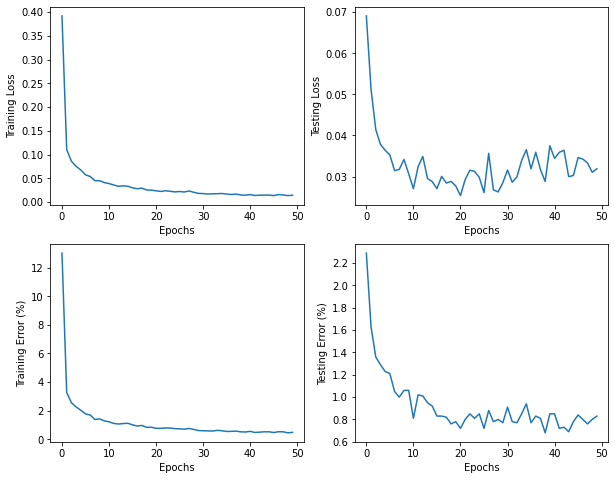

In [ ]:
# Plot training

plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.plot(train_loss_list)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')

plt.subplot(2,2,2)
plt.plot(test_loss_list)
plt.xlabel('Epochs')
plt.ylabel('Testing Loss')

plt.subplot(2,2,3)
plt.plot(train_err_list)
plt.xlabel('Epochs')
plt.ylabel('Training Error (%)')

plt.subplot(2,2,4)
plt.plot(test_err_list)
plt.xlabel('Epochs')
plt.ylabel('Testing Error (%)')

plt.show()